# Scvelo analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import cellrank as cr
import matplotlib.pyplot as plt

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
Path='/home/mgander/pancreas_multiome/data2'
adata=sc.read_h5ad(f'{Path}/Intestinal_epithelial_adata.h5ad')

In [3]:
adata.obs['day'].value_counts()

40.0    11800
84.0     8745
98.0     7775
59.0     5087
77.0     4782
28.0     4343
14.0     2447
7.0      2443
30.0      969
56.0      859
6.0       757
13.0      632
3.0       595
0.0       496
Name: day, dtype: int64

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


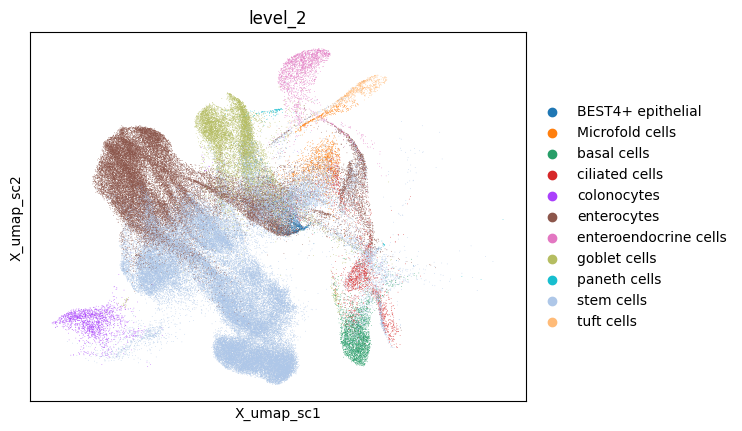

In [3]:
sc.pl.embedding(adata, basis='X_umap_sc', color='level_2')

In [4]:
adata

AnnData object with n_obs × n_vars = 118336 × 1807
    obs: 'sort_batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'day'
    uns: 'leiden', 'level_1_colors', 'level_2_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_initial', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# Calculating RNA velocities

In [4]:
scv.pp.moments(adata, use_rep='X_scPoli')

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:02:12) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:36) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [5]:
scv.tl.recover_dynamics(adata, n_jobs=2)

recovering dynamics (using 2/32 cores)


  0%|          | 0/756 [00:00<?, ?gene/s]

    finished (1:39:58) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [6]:
scv.tl.velocity(adata, mode="dynamical")

computing velocities
    finished (0:07:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
adata

AnnData object with n_obs × n_vars = 118336 × 1807
    obs: 'sort_batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'day', 'n_counts'
    var: 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'leiden', 'level_1_colors', 'level_2_colors', 'log1p', 'neighbors', 'umap', 'recover_dynamics', 'velocity_params'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_initial', 'X_umap_min', 'X_umap_sc'
    varm: 

In [ ]:
adata.write(f'{Path}/Intestinal_epithelial_scvelo_adata.h5ad')

In [2]:
Path='/home/mgander/pancreas_multiome/data2'
adata=sc.read_h5ad(f'{Path}/Intestinal_epithelial_scvelo_adata.h5ad')

In [4]:
scv.tl.velocity_graph(adata, n_jobs=5)

computing velocity graph (using 5/32 cores)


  0%|          | 0/118336 [00:00<?, ?cells/s]

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:04:31) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


# Cellrank to determine terminal states

In [5]:
vk=cr.kernels.VelocityKernel(adata)

In [6]:
vk.compute_transition_matrix()

  0%|          | 0/118336 [00:00<?, ?cell/s]

  0%|          | 0/118336 [00:00<?, ?cell/s]

VelocityKernel[n=118336, model='deterministic', similarity='correlation', softmax_scale=4.335]

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


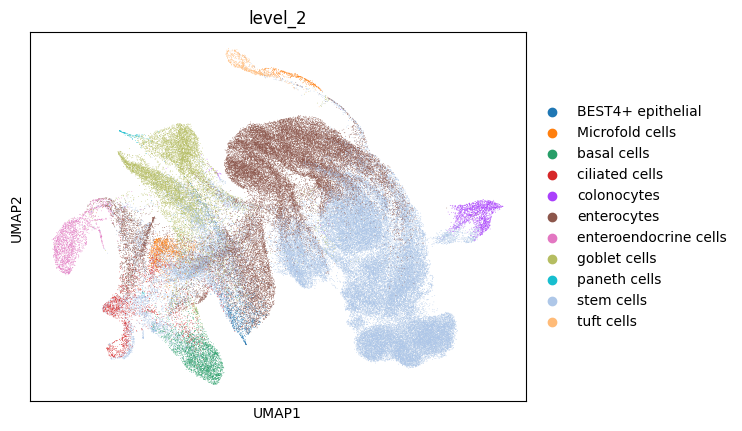

In [7]:
sc.pl.umap(adata, color='level_2')

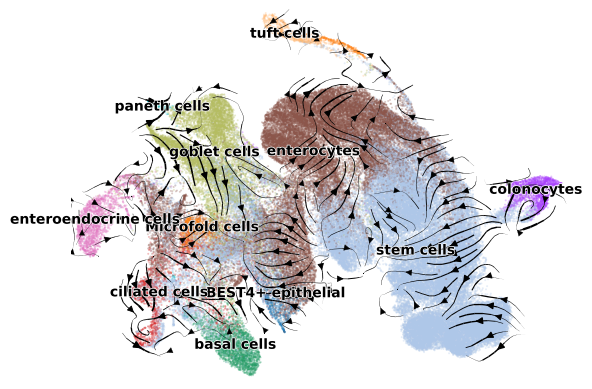

In [11]:
# This is the stream plot for only moscot+dpt (both weighted *0.5)
vk.plot_projection(basis='X_umap', color="level_2", recompute=True, connectivities=adata.obsp['connectivities'], title='')

In [9]:
import pickle
tm=vk.transition_matrix
with open(f'{Path}/scvelo.pkl', 'wb') as handle:
    pickle.dump(tm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
tm

<118336x118336 sparse matrix of type '<class 'numpy.float64'>'
	with 4871312 stored elements in Compressed Sparse Row format>

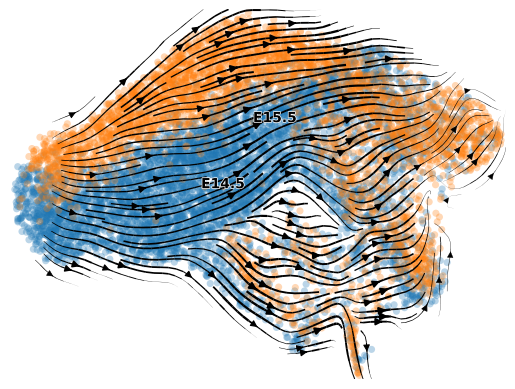

In [11]:
vk.plot_projection(basis='X_umap', color="sample", recompute=True, title='')

Renamed 'UMAP' to convention 'X_UMAP' (adata.obsm).


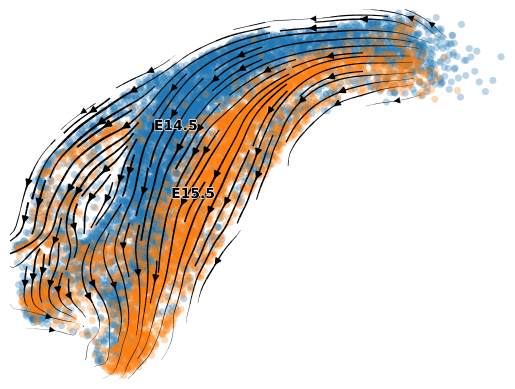

In [12]:
adata.obsm['UMAP']=adata.obsm['umap']
vk.plot_projection(basis='UMAP', color="sample", recompute=True, title='')

In [13]:
g = cr.estimators.GPCCA(vk)
g.compute_schur(n_components=20)

GPCCA[kernel=VelocityKernel[n=9179], initial_states=None, terminal_states=None]

In [26]:
# There is an error when setting terminal_states to 20 (that a cluster gets less than 6 cells), but 18 is enough 
# to recover all 4 terminal states
g.compute_macrostates(n_states=18, cluster_key="celltype")

GPCCA[kernel=VelocityKernel[n=9179], initial_states=None, terminal_states=None]

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


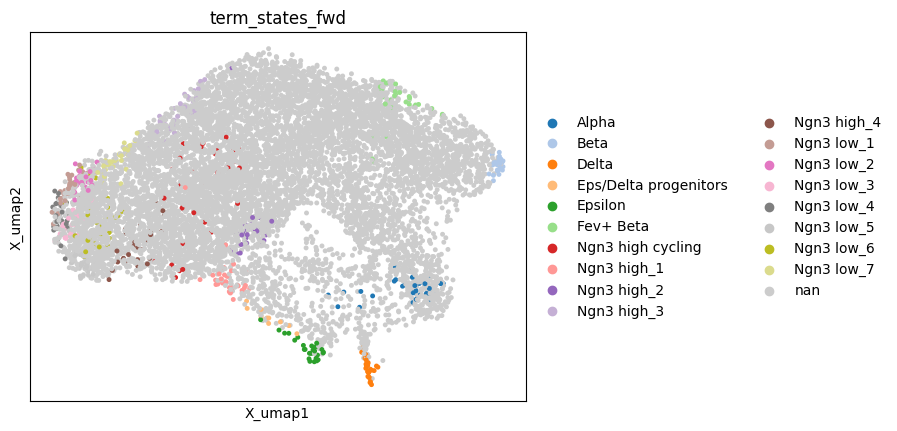

In [27]:
# For plotting all of them
g.predict_terminal_states(method="top_n", n_states=20)
adata.obs['term_states_fwd']=[str(a) for a in adata.obs['term_states_fwd']]

pal=sns.color_palette('tab20').copy()
pal.append([0.8,0.8,0.8])
pall=pal[:len(set(list(adata.obs['term_states_fwd'])))]
pall[-1]=np.array([0.8,0.8,0.8])

sc.pl.embedding(adata, basis='X_umap', color='term_states_fwd', palette=pall, size=50)

## Evaluating using amount of terminal states identified

In [28]:
# I consider these terminal states:
# Alpha, Beta, Epsilon, Delta

terminal_states=['Alpha', 'Beta', 'Epsilon', 'Delta']
def get_number_of_terminal_states(g, adata, n=5, terminal_states=terminal_states):
    g.predict_terminal_states(method="top_n", n_states=n)
    states=list(set(list(adata.obs['term_states_fwd'])))
    states_set=list(set([str(a).split('_')[0] for a in states]))
    n_there=np.sum([a in states_set for a in terminal_states])
    states.remove(np.NaN)
    return(n_there, states)

In [29]:
ns=[]
ss=[]
for i in range(1,21):
    n,s=get_number_of_terminal_states(g, adata, i)
    ns.append(n)
    ss.append(s)
df=pd.DataFrame({'n_term_states':range(1,21), 'n_endocrine_found':ns, 'all_states':ss})
df

,n_term_states,n_endocrine_found,all_states
0,1,1,[Delta]
1,2,1,"[Delta, Fev+ Beta]"
2,3,2,"[Delta, Beta, Fev+ Beta]"
3,4,2,"[Eps/Delta progenitors, Beta, Fev+ Beta, Delta]"
4,5,2,"[Eps/Delta progenitors, Ngn3 high_3, Beta, Fev..."
5,6,3,"[Eps/Delta progenitors, Alpha, Beta, Ngn3 high..."
6,7,4,"[Epsilon, Eps/Delta progenitors, Alpha, Beta, ..."
7,8,4,"[Epsilon, Eps/Delta progenitors, Alpha, Beta, ..."
8,9,4,"[Epsilon, Eps/Delta progenitors, Alpha, Beta, ..."
9,10,4,"[Epsilon, Eps/Delta progenitors, Alpha, Beta, ..."


In [30]:
df.to_pickle(f'{Path}/scvelo_term_state_numbers.pkl')

## Saving the kernel

In [17]:
#vk.write(f'{Path}/kernels/scvelo', write_adata=True, ext='pkl')